In [1]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

loading the data

In [2]:
train = pd.read_csv("C:\\Users\\EUROPELAPTOP\Desktop\\5th\\NLP\\Labs\\NLP_project\\data\\train.csv")
test = pd.read_csv("C:\\Users\\EUROPELAPTOP\Desktop\\5th\\NLP\\Labs\\NLP_project\\data\\test.csv")

**Checking out what an example note and JSON looks like**

In [3]:
print(train["Note"][0])

**Clinical Notes**

**Patient Information:**
- Age: 41 years old
- Gender: Male

**Visit Motivation:** Anemia evaluation

**Chief Complaints and Symptoms:**
The patient presents with complaints of anemia, fever, fatigue, difficulty breathing (dyspnea), vomiting, dizziness, blurred vision, wheezing, and pale skin. The patient reports that these symptoms have been progressively worsening over the past few weeks.

**History of Present Illness:**
- **Fever**: Intermittent low-grade fevers for approximately 2 weeks.
- **Fatigue**: Persistent and severe fatigue affecting daily activities.
- **Difficulty Breathing (Dyspnea)**: Experiencing shortness of breath, particularly with exertion. No history of chronic respiratory conditions.
- **Vomiting**: Occasional episodes of non-bilious vomiting for the past week.
- **Dizziness**: Episodes of dizziness, especially upon standing, which can be severe enough to cause near-fainting spells.
- **Blurred Vision**: New onset of blurred vision, with occas

In [4]:
json.loads(train["json"][0])


{'patient_info': {'age': 41, 'gender': 'Male'},
 'visit_motivation': 'Anemia',
 'symptoms': ['fever',
  'fatigue',
  'difficulty_breathing',
  'vomiting',
  'dizziness',
  'blurred_vision',
  'wheezing',
  'pale_skin'],
 'vital_signs': {'heart_rate': {'value': 114, 'unit': 'bpm'},
  'oxygen_saturation': {'value': 98.4, 'unit': '%'},
  'cholesterol_level': {'value': 132.8, 'unit': 'mg/dL'},
  'glucose_level': {'value': 110.6, 'unit': 'mg/dL'}}}

In [5]:
# Parse the JSON column
extracted_json = train['json'].apply(json.loads)

# Create new columns from the parsed JSON
json_fields_df = pd.json_normalize(extracted_json)

# Concatenate the original DataFrame with the new fields
train_data = pd.concat([train, json_fields_df], axis=1)

In [6]:
json_fields_df.head()

,visit_motivation,symptoms,patient_info.age,patient_info.gender,vital_signs.heart_rate.value,vital_signs.heart_rate.unit,vital_signs.oxygen_saturation.value,vital_signs.oxygen_saturation.unit,vital_signs.cholesterol_level.value,vital_signs.cholesterol_level.unit,vital_signs.glucose_level.value,vital_signs.glucose_level.unit,vital_signs.temperature.value,vital_signs.temperature.unit,vital_signs.respiratory_rate.value,vital_signs.respiratory_rate.unit,vital_signs.blood_pressure.systolic.value,vital_signs.blood_pressure.systolic.unit,vital_signs.blood_pressure.diastolic.value,vital_signs.blood_pressure.diastolic.unit
0,Anemia,"[fever, fatigue, difficulty_breathing, vomitin...",41,Male,114.0,bpm,98.4,%,132.8,mg/dL,110.6,mg/dL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allergies,"[runny_nose, sneezing, itchy_eyes, blurred_vis...",56,Male,NaN,NaN,NaN,NaN,NaN,NaN,99.0,mg/dL,36.6,°C,13.0,breaths/min,NaN,NaN,NaN,NaN
2,Diabetes (Type 2),"[fever, headache, difficulty_breathing, chest_...",73,Female,92.0,bpm,NaN,NaN,173.0,mg/dL,224.8,mg/dL,NaN,NaN,18.0,breaths/min,NaN,NaN,NaN,NaN
3,Allergies,"[fatigue, abdominal_pain, runny_nose, rash, jo...",32,Female,70.0,bpm,98.2,%,NaN,NaN,139.8,mg/dL,36.9,°C,19.0,breaths/min,97.0,mmHg,79.0,mmHg
4,Tuberculosis (TB),"[fever, cough, nausea, joint_pain, sneezing, f...",51,Male,NaN,NaN,NaN,NaN,125.7,mg/dL,70.7,mg/dL,NaN,NaN,19.0,breaths/min,92.0,mmHg,74.0,mmHg


In [7]:
#Resulting normalized columns for analysis
print(train_data.columns)

Index(['ID', 'Note', 'json', 'visit_motivation', 'symptoms',
       'patient_info.age', 'patient_info.gender',
       'vital_signs.heart_rate.value', 'vital_signs.heart_rate.unit',
       'vital_signs.oxygen_saturation.value',
       'vital_signs.oxygen_saturation.unit',
       'vital_signs.cholesterol_level.value',
       'vital_signs.cholesterol_level.unit', 'vital_signs.glucose_level.value',
       'vital_signs.glucose_level.unit', 'vital_signs.temperature.value',
       'vital_signs.temperature.unit', 'vital_signs.respiratory_rate.value',
       'vital_signs.respiratory_rate.unit',
       'vital_signs.blood_pressure.systolic.value',
       'vital_signs.blood_pressure.systolic.unit',
       'vital_signs.blood_pressure.diastolic.value',
       'vital_signs.blood_pressure.diastolic.unit'],
      dtype='object')


In [8]:
train_data.head()

,ID,Note,json,visit_motivation,symptoms,patient_info.age,patient_info.gender,vital_signs.heart_rate.value,vital_signs.heart_rate.unit,vital_signs.oxygen_saturation.value,...,vital_signs.glucose_level.value,vital_signs.glucose_level.unit,vital_signs.temperature.value,vital_signs.temperature.unit,vital_signs.respiratory_rate.value,vital_signs.respiratory_rate.unit,vital_signs.blood_pressure.systolic.value,vital_signs.blood_pressure.systolic.unit,vital_signs.blood_pressure.diastolic.value,vital_signs.blood_pressure.diastolic.unit
0,1,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}...",Anemia,"[fever, fatigue, difficulty_breathing, vomitin...",41,Male,114.0,bpm,98.4,...,110.6,mg/dL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Clinical Notes:\n\nPatient: 56-year-old male\n...,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}...",Allergies,"[runny_nose, sneezing, itchy_eyes, blurred_vis...",56,Male,NaN,NaN,NaN,...,99.0,mg/dL,36.6,°C,13.0,breaths/min,NaN,NaN,NaN,NaN
2,3,Clinical Notes:\n\nPatient: 73-year-old female...,"{""patient_info"": {""age"": 73, ""gender"": ""Female...",Diabetes (Type 2),"[fever, headache, difficulty_breathing, chest_...",73,Female,92.0,bpm,NaN,...,224.8,mg/dL,NaN,NaN,18.0,breaths/min,NaN,NaN,NaN,NaN
3,4,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 32, ""gender"": ""Female...",Allergies,"[fatigue, abdominal_pain, runny_nose, rash, jo...",32,Female,70.0,bpm,98.2,...,139.8,mg/dL,36.9,°C,19.0,breaths/min,97.0,mmHg,79.0,mmHg
4,5,"**Clinical Notes**\n\n**Patient:** Male, age 5...","{""patient_info"": {""age"": 51, ""gender"": ""Male""}...",Tuberculosis (TB),"[fever, cough, nausea, joint_pain, sneezing, f...",51,Male,NaN,NaN,NaN,...,70.7,mg/dL,NaN,NaN,19.0,breaths/min,92.0,mmHg,74.0,mmHg


In [9]:
column_rename_map = {
    'visit_motivation':'visit motivation',
    'patient_info.age': 'age',
    'patient_info.gender': 'gender',
    'vital_signs.heart_rate.value': 'heart rate value',
    'vital_signs.heart_rate.unit': 'heart rate unit',
    'vital_signs.oxygen_saturation.value': 'oxygen saturation value',
    'vital_signs.oxygen_saturation.unit': 'oxygen saturation unit',
    'vital_signs.cholesterol_level.value': 'cholesterol level value',
    'vital_signs.cholesterol_level.unit': 'cholesterol level unit',
    'vital_signs.glucose_level.value': 'glucose level value',
    'vital_signs.glucose_level.unit': 'glucose level unit',
    'vital_signs.temperature.value': 'temperature value',
    'vital_signs.temperature.unit': 'temperature unit',
    'vital_signs.respiratory_rate.value': 'respiratory rate value',
    'vital_signs.respiratory_rate.unit': 'respiratory rate unit',
    'vital_signs.blood_pressure.systolic.value': 'blood pressure systolic value',
    'vital_signs.blood_pressure.systolic.unit': 'blood pressure systolic unit',
    'vital_signs.blood_pressure.diastolic.value': 'blood pressure diastolic value',
    'vital_signs.blood_pressure.diastolic.unit': 'blood pressure diastolic unit'
}

train_data.rename(columns=column_rename_map, inplace=True)


In [10]:
train_data.head()

,ID,Note,json,visit motivation,symptoms,age,gender,heart rate value,heart rate unit,oxygen saturation value,...,glucose level value,glucose level unit,temperature value,temperature unit,respiratory rate value,respiratory rate unit,blood pressure systolic value,blood pressure systolic unit,blood pressure diastolic value,blood pressure diastolic unit
0,1,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 41, ""gender"": ""Male""}...",Anemia,"[fever, fatigue, difficulty_breathing, vomitin...",41,Male,114.0,bpm,98.4,...,110.6,mg/dL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Clinical Notes:\n\nPatient: 56-year-old male\n...,"{""patient_info"": {""age"": 56, ""gender"": ""Male""}...",Allergies,"[runny_nose, sneezing, itchy_eyes, blurred_vis...",56,Male,NaN,NaN,NaN,...,99.0,mg/dL,36.6,°C,13.0,breaths/min,NaN,NaN,NaN,NaN
2,3,Clinical Notes:\n\nPatient: 73-year-old female...,"{""patient_info"": {""age"": 73, ""gender"": ""Female...",Diabetes (Type 2),"[fever, headache, difficulty_breathing, chest_...",73,Female,92.0,bpm,NaN,...,224.8,mg/dL,NaN,NaN,18.0,breaths/min,NaN,NaN,NaN,NaN
3,4,**Clinical Notes**\n\n**Patient Information:**...,"{""patient_info"": {""age"": 32, ""gender"": ""Female...",Allergies,"[fatigue, abdominal_pain, runny_nose, rash, jo...",32,Female,70.0,bpm,98.2,...,139.8,mg/dL,36.9,°C,19.0,breaths/min,97.0,mmHg,79.0,mmHg
4,5,"**Clinical Notes**\n\n**Patient:** Male, age 5...","{""patient_info"": {""age"": 51, ""gender"": ""Male""}...",Tuberculosis (TB),"[fever, cough, nausea, joint_pain, sneezing, f...",51,Male,NaN,NaN,NaN,...,70.7,mg/dL,NaN,NaN,19.0,breaths/min,92.0,mmHg,74.0,mmHg


Number of rows and columns

In [11]:
print(f"Dataset Shape: {train_data.shape}")

Dataset Shape: (10822, 23)


Data Types

In [12]:
print("Data Types:\n", train_data.dtypes)

Data Types:
 ID                                  int64
Note                               object
json                               object
visit motivation                   object
symptoms                           object
age                                 int64
gender                             object
heart rate value                  float64
heart rate unit                    object
oxygen saturation value           float64
oxygen saturation unit             object
cholesterol level value           float64
cholesterol level unit             object
glucose level value               float64
glucose level unit                 object
temperature value                 float64
temperature unit                   object
respiratory rate value            float64
respiratory rate unit              object
blood pressure systolic value     float64
blood pressure systolic unit       object
blood pressure diastolic value    float64
blood pressure diastolic unit      object
dtype: object


In [ ]:
for column in [col for col in train_data.columns if 'unit' in col]:
    print(f"Unique values in {column}: {train_data[column].unique()}")

Unique values in heart rate unit: ['bpm' nan]
Unique values in oxygen saturation unit: ['%' nan]
Unique values in cholesterol level unit: ['mg/dL' nan]
Unique values in glucose level unit: ['mg/dL' nan]
Unique values in temperature unit: [nan '°C']
Unique values in respiratory rate unit: [nan 'breaths/min']
Unique values in blood pressure systolic unit: [nan 'mmHg']
Unique values in blood pressure diastolic unit: [nan 'mmHg']


Change the data type of objects

In [14]:
#to string
train_data['Note'] = train_data['Note'].astype('string')
train_data['visit motivation'] = train_data['visit motivation'].astype('string')
#to list

#to category
units_columns = [
    'gender',
    'heart rate unit',
    'oxygen saturation unit',
    'cholesterol level unit',
    'glucose level unit',
    'temperature unit',
    'respiratory rate unit',
    'blood pressure systolic unit',
    'blood pressure diastolic unit'
]
for col in units_columns:
    train_data[col] = train_data[col].astype('category')


In [15]:
print(train_data.select_dtypes(include='object').columns)

Index(['json', 'symptoms'], dtype='object')


In [16]:
print(train_data.dtypes)

ID                                         int64
Note                              string[python]
json                                      object
visit motivation                  string[python]
symptoms                                  object
age                                        int64
gender                                  category
heart rate value                         float64
heart rate unit                         category
oxygen saturation value                  float64
oxygen saturation unit                  category
cholesterol level value                  float64
cholesterol level unit                  category
glucose level value                      float64
glucose level unit                      category
temperature value                        float64
temperature unit                        category
respiratory rate value                   float64
respiratory rate unit                   category
blood pressure systolic value            float64
blood pressure systo

Missing Values

In [17]:
print("Missing Values:\n", train_data.isnull().sum())

Missing Values:
 ID                                   0
Note                                 0
json                                 0
visit motivation                     0
symptoms                             0
age                                  0
gender                               0
heart rate value                  5045
heart rate unit                   5045
oxygen saturation value           5238
oxygen saturation unit            5238
cholesterol level value           5495
cholesterol level unit            5495
glucose level value               5402
glucose level unit                5402
temperature value                 4911
temperature unit                  4911
respiratory rate value            5171
respiratory rate unit             5171
blood pressure systolic value     5532
blood pressure systolic unit      5532
blood pressure diastolic value    5532
blood pressure diastolic unit     5532
dtype: int64


unique values

In [18]:
for column in train_data.columns:
    if column == 'symptoms':

        temp_column = train_data[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
        unique_values = temp_column.nunique()
    else:
        unique_values = train_data[column].nunique()
    
    print(f"{column}: {unique_values} unique values")


ID: 10822 unique values
Note: 10822 unique values
json: 10822 unique values
visit motivation: 20 unique values
symptoms: 10814 unique values
age: 86 unique values
gender: 2 unique values
heart rate value: 81 unique values
heart rate unit: 1 unique values
oxygen saturation value: 142 unique values
oxygen saturation unit: 1 unique values
cholesterol level value: 751 unique values
cholesterol level unit: 1 unique values
glucose level value: 1057 unique values
glucose level unit: 1 unique values
temperature value: 32 unique values
temperature unit: 1 unique values
respiratory rate value: 19 unique values
respiratory rate unit: 1 unique values
blood pressure systolic value: 82 unique values
blood pressure systolic unit: 1 unique values
blood pressure diastolic value: 57 unique values
blood pressure diastolic unit: 1 unique values


Value Counts

In [19]:
for column in ['gender']:  
    print(f"Value Counts for {column}:\n", train_data[column].value_counts())

Value Counts for gender:
 gender
Female    5437
Male      5385
Name: count, dtype: int64


In [20]:
for column in ['visit motivation']:  
    print(f"Value Counts for {column}:\n", train_data[column].value_counts())

Value Counts for visit motivation:
 visit motivation
Urinary Tract Infection (UTI)                   598
Hypertension (High Blood Pressure)              593
Allergies                                       584
Gastroesophageal Reflux Disease (GERD)          582
Eczema (Atopic Dermatitis)                      578
Anxiety Disorders                               571
Strep Throat                                    567
Influenza (Flu)                                 559
Tuberculosis (TB)                               535
Depression                                      533
Diabetes (Type 2)                               533
Ear Infection (Otitis Media)                    533
Anemia                                          525
Heart Disease (Coronary Artery Disease)         512
Pneumonia                                       511
Sinusitis                                       510
Chronic Obstructive Pulmonary Disease (COPD)    504
Asthma                                          502
Common Cold

<h2>Data analysis

Descriptive Statistics

In [21]:
print("Descriptive Statistics:\n", train_data.describe())
# Count: عدد القيم غير المفقودة في كل عمود.
# Mean: المتوسط الحسابي للقيم في العمود.
# Std: الانحراف المعياري (يُظهر مدى تباعد القيم عن المتوسط).
# Min: القيمة الصغرى في العمود.
# 25%: الربع الأول (25% من البيانات أقل من هذه القيمة).
# 50% (Median): الوسيط (50% من البيانات أقل من هذه القيمة).
# 75%: الربع الثالث (75% من البيانات أقل من هذه القيمة).
# Max: القيمة الكبرى في العمود.

Descriptive Statistics:
                  ID           age  heart rate value  oxygen saturation value  \
count  10822.000000  10822.000000       5777.000000              5584.000000   
mean    5411.500000     48.249954         86.003462                96.300645   
std     3124.186641     23.499677         18.434384                 3.276248   
min        1.000000     15.000000         60.000000                85.000000   
25%     2706.250000     27.000000         72.000000                95.600000   
50%     5411.500000     46.000000         84.000000                97.100000   
75%     8116.750000     65.000000         95.000000                98.500000   
max    10822.000000    100.000000        140.000000               100.000000   

       cholesterol level value  glucose level value  temperature value  \
count              5327.000000          5420.000000        5911.000000   
mean                161.649859           114.703875          37.413636   
std                  21.585593  

Distribution of Age

c:\Users\EUROPELAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


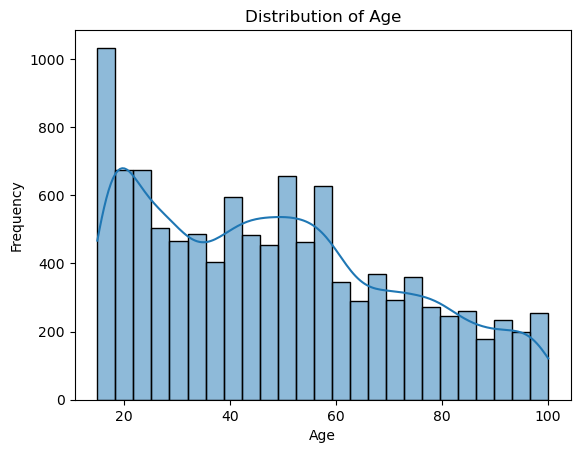

In [22]:
sns.histplot(train_data['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Count the values ​​in each category

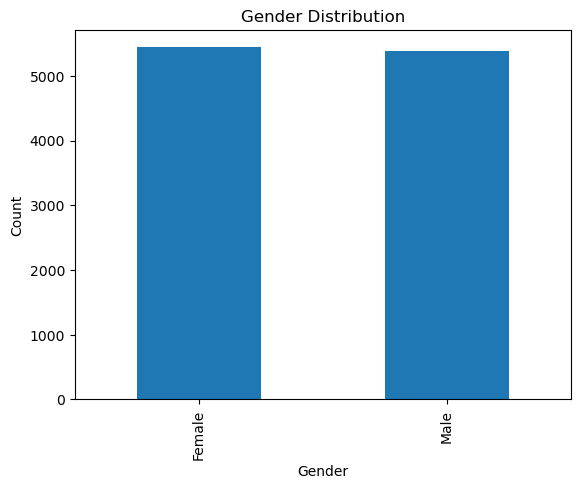

In [23]:
train_data['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

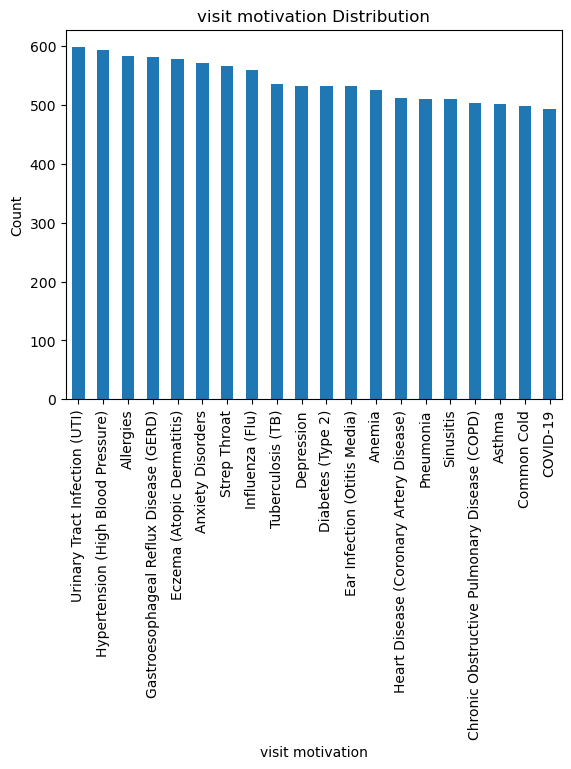

In [24]:
train_data['visit motivation'].value_counts().plot(kind='bar')
plt.title('visit motivation Distribution')
plt.xlabel('visit motivation')
plt.ylabel('Count')
plt.show()


c:\Users\EUROPELAPTOP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


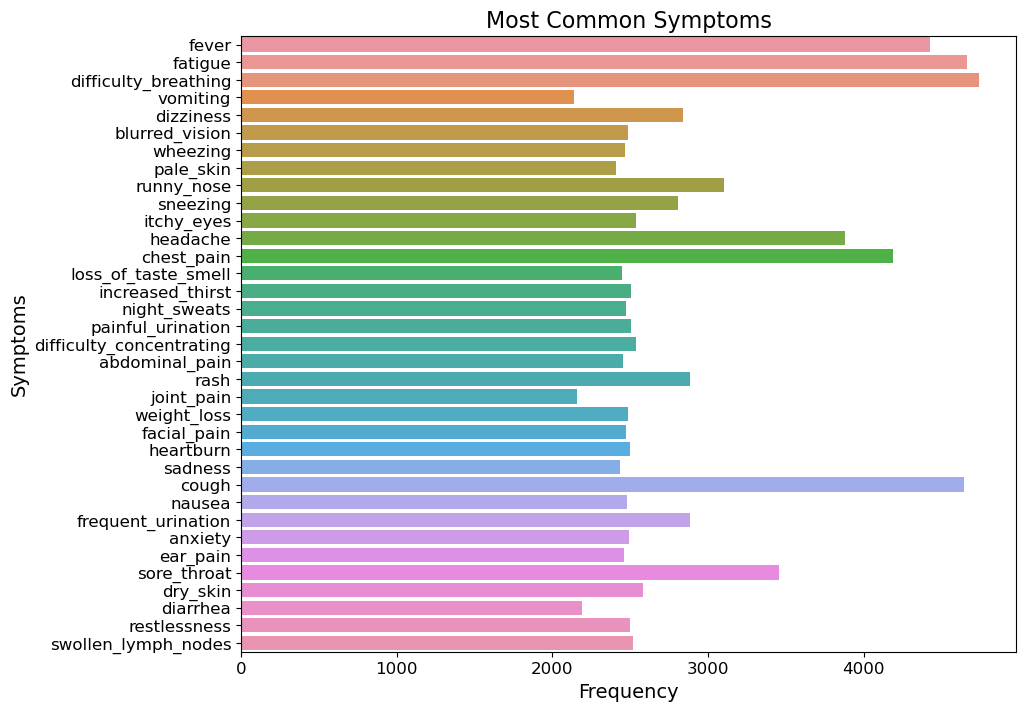

In [25]:
train_data['symptoms'] = train_data['symptoms'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

symptoms_flat = [symptom for sublist in train_data['symptoms'] if isinstance(sublist, list) for symptom in sublist]

symptom_counts = Counter(symptoms_flat)

plt.figure(figsize=(10, 8)) 
sns.barplot(x=list(symptom_counts.values()), y=list(symptom_counts.keys()))

plt.title('Most Common Symptoms', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Symptoms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


world cloud for data

In [26]:
# Collect texts from notes and json column
notes_text = " ".join(train_data['Note'].dropna())
json_text = " ".join(train_data['json'].dropna())

# Split texts into words
notes_words = notes_text.split()
json_words = json_text.split()

# Count repeated words
notes_counter = Counter(notes_words)
json_counter = Counter(json_words)

In [27]:
# Extract unique and duplicate words
unique_notes_words = set(notes_words) - set(json_words)  # notes
unique_json_words = set(json_words) - set(notes_words)  # json
common_words = set(notes_words).intersection(set(json_words))  # Common words

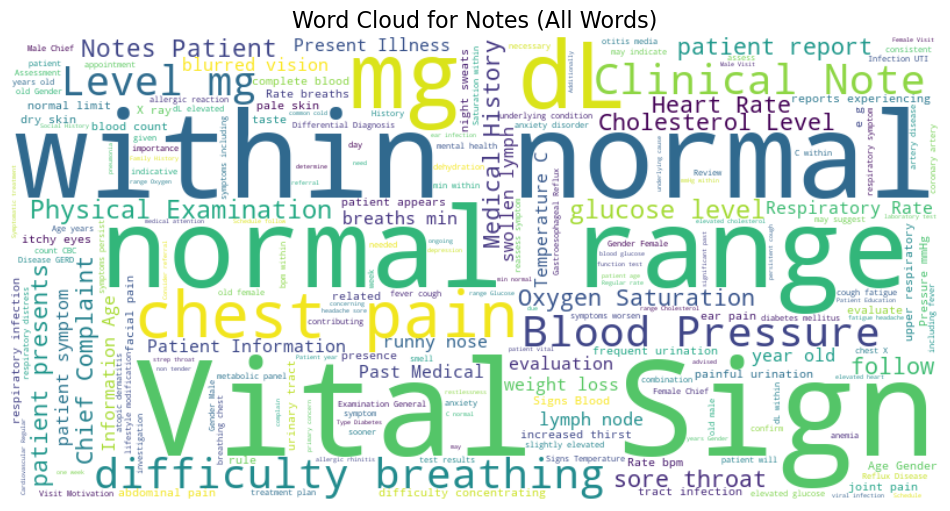

In [28]:
# drawing Word Cloud for all words in notes
wordcloud_notes = WordCloud(width=800, height=400, background_color='white').generate(notes_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_notes, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Notes (All Words)", fontsize=16)
plt.show()

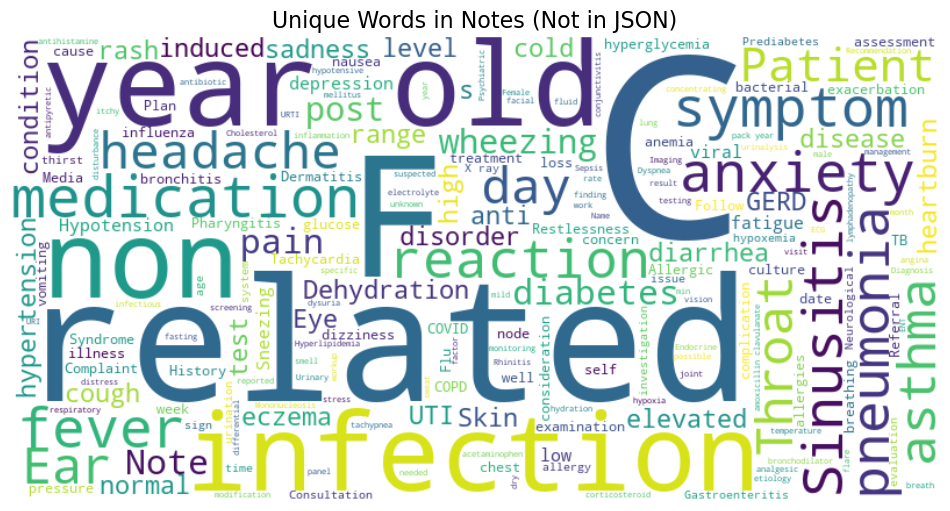

In [29]:
#drawing Word Cloud only for unique words in notes
wordcloud_unique_notes = WordCloud(width=800, height=400, background_color='white').generate(" ".join(unique_notes_words))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_unique_notes, interpolation='bilinear')
plt.axis('off')
plt.title("Unique Words in Notes (Not in JSON)", fontsize=16)
plt.show()

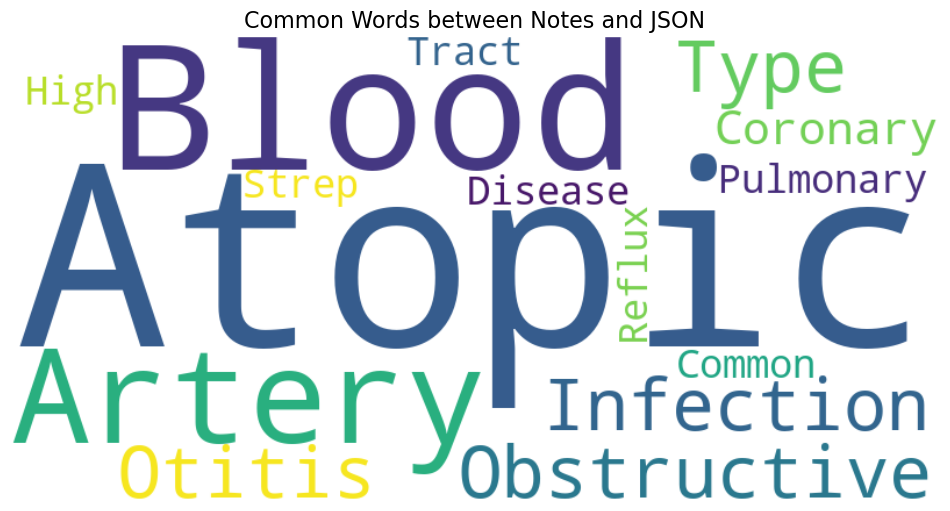

In [30]:
#drawing Word Cloud  for words shared between notes and json
wordcloud_common = WordCloud(width=800, height=400, background_color='white').generate(" ".join(common_words))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_common, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words between Notes and JSON", fontsize=16)
plt.show()


In [31]:
#Display statistics
print("Top 20 Most Common Words in Notes:")
print(notes_counter.most_common(20))

print("\nTop 20 Most Common Words in JSON:")
print(json_counter.most_common(20))

print("\nWords in Notes but not in JSON (Unique to Notes):")
print(list(unique_notes_words)[:20])

print("\nWords in JSON but not in Notes (Unique to JSON):")
print(list(unique_json_words)[:20])


Top 20 Most Common Words in Notes:
[('-', 136638), ('and', 131786), ('of', 82996), ('the', 69089), ('to', 68902), ('a', 58573), ('The', 56074), ('or', 41629), ('patient', 39267), ('for', 37700), ('with', 36686), ('symptoms', 35562), ('*', 30299), ('is', 28035), ('be', 25192), ("patient's", 24354), ('may', 17190), ('normal', 16840), ('on', 16115), ('in', 16110)]

Top 20 Most Common Words in JSON:
[('{"value":', 44250), ('"unit":', 44250), ('{"patient_info":', 10822), ('{"age":', 10822), ('"gender":', 10822), ('"visit_motivation":', 10822), ('"symptoms":', 10822), ('"vital_signs":', 10822), ('"mg/dL"}}}', 8112), ('"\\u00b0C"},', 5747), ('"Female"},', 5437), ('"bpm"},', 5405), ('"Male"},', 5385), ('"glucose_level":', 5352), ('"oxygen_saturation":', 5300), ('{"blood_pressure":', 5290), ('{"systolic":', 5290), ('"mmHg"},', 5290), ('"diastolic":', 5290), ('"mmHg"}},', 5217)]

Words in Notes but not in JSON (Unique to Notes):
['"can\'t', 'samples,', 'known]', 'prevent', '**咽炎:**', 'Details:**

<h2>Let's build a baseline that averages the numeric values and uses the most common categorical values</h2>
We will pack this into a constant json response and then measure how it does on the training set

In [32]:
from collections import Counter
import json
import pandas as pd

# افترض أن البيانات مخزنة في DataFrame باسم train_data

# تعريف القواميس لتخزين أكثر القيم شيوعًا أو القيم المتوسطة
common_values = {}
average_values = {}

# حساب القيم الأكثر شيوعًا للأعمدة الفئوية
categorical_columns = ['visit motivation', 'gender', 'symptoms']
for column in categorical_columns:
    if column == 'symptoms':
        # تحويل القوائم في عمود الأعراض إلى قائمة مسطحة والعثور على أكثر 10 أعراض شيوعًا
        symptoms_list = train_data['symptoms'].explode()
        common_values[column] = symptoms_list.value_counts().nlargest(10).index.tolist()
    else:
        # بالنسبة للأعمدة ذات القيم الفردية، العثور على القيمة الأكثر شيوعًا
        common_values[column] = train_data[column].mode()[0]

# حساب القيم المتوسطة للأعمدة الرقمية
numeric_columns = [
    'age', 
    'heart rate value', 
    'oxygen saturation value',
    'cholesterol level value', 
    'glucose level value'
]
for column in numeric_columns:
    average_values[column] = train_data[column].mean()

# دمج النتائج في قاموس يشبه JSON
dummy_submission = {
    "patient_info": {
        "age": average_values['age'],
        "gender": common_values['gender']
    },
    "visit motivation": common_values['visit motivation'],
    "symptoms": common_values['symptoms'],
    "vital_signs": {
        "heart_rate": {
            "value": average_values['heart rate value'],
            "unit": "bpm"
        },
        "oxygen_saturation": {
            "value": average_values['oxygen saturation value'],
            "unit": "%"
        },
        "cholesterol_level": {
            "value": average_values['cholesterol level value'],
            "unit": "mg/dL"
        },
        "glucose_level": {
            "value": average_values['glucose level value'],
            "unit": "mg/dL"
        }
    }
}

# تحويل الإخراج إلى تنسيق JSON
dummy_submission_json = json.dumps(dummy_submission, indent=4)
print(dummy_submission_json)


{
    "patient_info": {
        "age": 48.24995379781926,
        "gender": "Female"
    },
    "visit motivation": "Urinary Tract Infection (UTI)",
    "symptoms": [
        "difficulty_breathing",
        "fatigue",
        "cough",
        "fever",
        "chest_pain",
        "headache",
        "sore_throat",
        "runny_nose",
        "rash",
        "frequent_urination"
    ],
    "vital_signs": {
        "heart_rate": {
            "value": 86.0034620045006,
            "unit": "bpm"
        },
        "oxygen_saturation": {
            "value": 96.3006446991404,
            "unit": "%"
        },
        "cholesterol_level": {
            "value": 161.64985920780927,
            "unit": "mg/dL"
        },
        "glucose_level": {
            "value": 114.70387453874538,
            "unit": "mg/dL"
        }
    }
}


In [33]:
# import sys
# from metric import score


In [38]:
# %pip install metric

In [35]:
predictions = train.copy()
predictions["json"] = dummy_submission_json

## Measuring the performance
We can measure how the model does using the provided scoring function. This is a model free baseline just returning constant responses based on some aggregations

In [ ]:
score(train[["ID", "json"]], predictions[["ID", "json"]], "ID")

In [10]:
sample_submission = pd.read_csv("/kaggle/input/medical-note-extraction-h-2-o-gen-ai-world-ny/sample_submission.csv")

In [11]:
sample_submission["json"] = dummy_submission_json

In [12]:
sample_submission.to_csv("submission.csv", index = False)